___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 


# TERCER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS


## Nombre: Betsy Leticia Torres López

## Fecha: 25 de Noviembre del 2020

## Por: Oscar David Jaramillo Z.

## <span style="background:yellow">CLASE NOTEBOOK 24<span>

# 1
Implementar el **método de esquemas del trapecio**
$$\hat V_0^{(2)}= {e^{-rT} \over M} \sum_{j=1}^{M} \Bigg({h\over 2T} \sum_{i=0}^{N-1} S_{t_i}(2+rh+(W_{t_{i+1}}-W_{t_i})\sigma)-K \Bigg)_+,$$
para valuar la opción call y put asiática con precio inicial, $S_0 = 100$, precio de ejercicio $K = 100$, tasa libre de riesgo $r = 0.10$, volatilidad $\sigma = 0.20$ y $T = 1$ año. Cuyo precio es $\approx 7.04$. Realizar la simulación en base a la siguiente tabla:
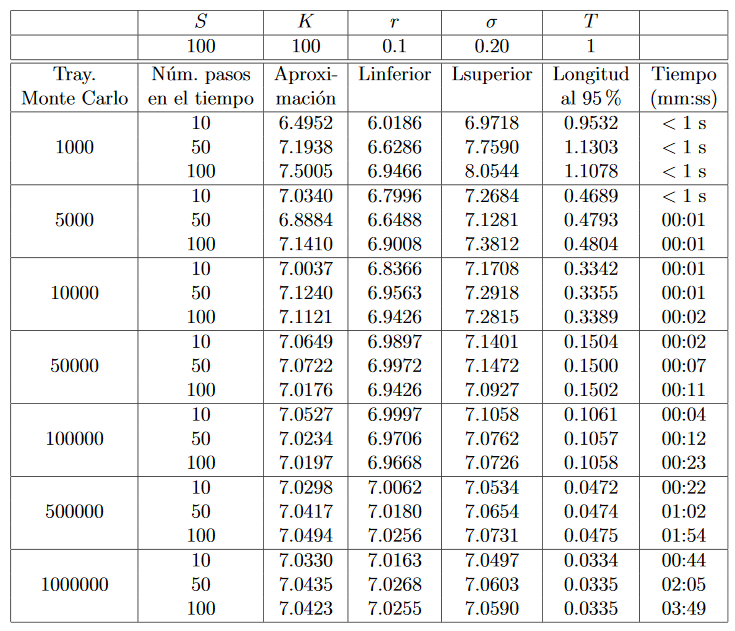

Observe que en esta tabla se encuentran los intervalos de confianza de la aproximación obtenida y además el tiempo de simulación que tarda en encontrar la respuesta cada método. 
- Se debe entonces realizar una simulación para la misma cantidad de trayectorias y número de pasos y construir una Dataframe de pandas de igual forma como se muestra en la tabla anterior donde se reporten los resultados obtenidos.

In [8]:
NbTraj = [1000,5000,10000,50000,100000,500000,1000000] 
NbStep = [10,50,100]

S0 = 100     # Precio inicial
r = 0.10     # Tasa libre de riesgo 
sigma = 0.2  # volatilidad
K = 100      # Strike price
T = 1        # Tiempo de cierre - años

## Opción call

In [11]:
def Trapecio_call(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad',T:'Tiempo de cierre del contrato en años',
                    flag=None):
    # Resolvemos la ecuación de black scholes para obtener los precios
    t_i = time()
    St,t = BSprices(r,sigma,S0,NbTraj,NbStep)
    # Almacenamos los precios en un dataframe
    prices = pd.DataFrame(St,index=t)

    h = T/NbStep
    Average_t = np.cumsum(np.multiply(prices,(2+r*h+np.random.randn(NbStep,NbTraj)*sigma)))*h/(2*T)
    # Definimos el dataframe de strikes
    strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=t)
    # Calculamos el call de la opción según la formula obtenida para Sumas de Riemann
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(Average_t-strike,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    # intervalos de confianza
    confianza = 0.95
    sigma_est = call.sem().Prima
    mean_est = call.iloc[-1].Prima
    i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    t_f = time()
    t_e = t_f-t_i
    return call.iloc[-1].Prima,i1[0],i1[1],i1[1]-i1[0],t_e

In [12]:
Trap_call = list(map(lambda N_tra:list(map(lambda N_ste:Trapecio_call(K,r,S0,N_tra,N_ste,sigma,T),NbStep)), NbTraj))

In [13]:
trap_call_arr = np.array([Trap_call[div[i]][mod[i]] for i in range(len(div))])

aprox_trap_call = np.array([i[0] for i in trap_call_arr])

Linf_trap_call = np.array([i[1] for i in trap_call_arr])

Lsup_trap_call = np.array([i[2] for i in trap_call_arr])

tiempos_trap_call = np.array([i[3] for i in trap_call_arr])

Ldiff_trap_call = np.array(Lsup_trap_call-Linf_trap_call)

tabla_trap_call = pd.DataFrame(index=indx,columns=['Aproximacion','L. Inf','L. Sup','Long. 95%','Tiempo (segs)'])
tabla_trap_call.index.names = (['Tray Monte Carlo','Núm pasos en el tiempo'])
tabla_trap_call['Aproximacion'] = aprox_trap_call
tabla_trap_call['L. Inf'] = Linf_trap_call
tabla_trap_call['L. Sup'] = Lsup_trap_call
tabla_trap_call['Long. 95%'] = Ldiff_trap_call
tabla_trap_call['Tiempo (segs)'] = np.round(tiempos_trap_call,2)
tabla_trap_call

Aproximacion  L. Inf  L. Sup  \
Tray Monte Carlo Núm pasos en el tiempo                                 
1000             10                             7.009   5.634   8.383   
                 50                             7.212   6.782   7.641   
                 100                            6.568   6.309   6.827   
5000             10                             6.881   5.532   8.230   
                 50                             7.088   6.669   7.507   
                 100                            7.181   6.898   7.465   
10000            10                             7.023   5.646   8.401   
                 50                             7.042   6.626   7.458   
                 100                            6.854   6.585   7.123   
50000            10                             6.887   5.537   8.238   
                 50                             6.995   6.582   7.408   
                 100                            7.066   6.788   7.344   
100000           10                             6.868   5.522   8.215   
                 50                             7.052   6.635   7.469   
                 100                            7.016   6.740   7.292   
500000           10                             6.902   5.548   8.256   
                 50                             7.009   6.595   7.423   
                 100                            7.035   6.758   7.311   
1000000          10                             6.907   5.552   8.261   
                 50                             7.023   6.608   7.438   
                 100                            7.033   6.756   7.309   

                                         Long. 95%  Tiempo (segs)  
Tray Monte Carlo Núm pasos en el tiempo                            
1000             10                          2.749           2.75  
                 50                          0.859           0.86  
                 100                         0.519           0.52  
5000             10                          2.698           2.70  
                 50                          0.838           0.84  
                 100                         0.566           0.57  
10000            10                          2.755           2.76  
                 50                          0.832           0.83  
                 100                         0.538           0.54  
50000            10                          2.701           2.70  
                 50                          0.826           0.83  
                 100                         0.556           0.56  
100000           10                          2.694           2.69  
                 50                          0.834           0.83  
                 100                         0.552           0.55  
500000           10                          2.707           2.71  
                 50                          0.828           0.83  
                 100                         0.553           0.55  
1000000          10                          2.709           2.71  
                 50                          0.829           0.83  
                 100                         0.553           0.55

## Opción put

In [17]:
def Trapecio_put(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad',T:'Tiempo de cierre del contrato en años',
                    flag=None):
    # Resolvemos la ecuación de black scholes para obtener los precios
    t_i = time()
    St,t = BSprices(r,sigma,S0,NbTraj,NbStep)
    # Almacenamos los precios en un dataframe
    prices = pd.DataFrame(St,index=t)
  
    h = T/NbStep
    Average_t = np.cumsum(np.multiply(prices,(2+r*h+np.random.randn(NbStep,NbTraj)*sigma)))*h/(2*T)
    # Definimos el dataframe de strikes
    strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=t)
    # Calculamos el put de la opción según la formula obtenida para Sumas de Riemann
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(strike-Average_t,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    # intervalos de confianza
    confianza = 0.95
    sigma_est = call.sem().Prima
    mean_est = call.iloc[-1].Prima
    i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    t_f = time()
    t_e = t_f-t_i
    return call.iloc[-1].Prima,i1[0],i1[1],i1[1]-i1[0],t_e

In [18]:
Trap_put = list(map(lambda N_tra:list(map(lambda N_ste:Trapecio_put(K,r,S0,N_tra,N_ste,sigma,T),NbStep)), NbTraj))

In [19]:
trap_put_arr = np.array([Trap_put[div[i]][mod[i]] for i in range(len(div))])
aprox_trap_put = np.array([i[0] for i in trap_put_arr])
Linf_trap_put = np.array([i[1] for i in trap_put_arr])
Lsup_trap_put = np.array([i[2] for i in trap_put_arr])
tiempos_trap_put = np.array([i[3] for i in trap_put_arr])
Ldiff_trap_put = np.array(Lsup_trap_put-Linf_trap_put)

tabla_trap_put = pd.DataFrame(index=indx,columns=['Aproximacion','L. Inf','L. Sup','Long. 95%','Tiempo (segs)'])
tabla_trap_put.index.names = (['Tray Monte Carlo','Núm pasos en el tiempo'])
tabla_trap_put['Aproximacion'] = aprox_trap_put
tabla_trap_put['L. Inf'] = Linf_trap_put
tabla_trap_put['L. Sup'] = Lsup_trap_put
tabla_trap_put['Long. 95%'] = Ldiff_trap_put
tabla_trap_put['Tiempo (segs)'] = np.round(tiempos_trap_put,2)
tabla_trap_put

Aproximacion  L. Inf  L. Sup  \
Tray Monte Carlo Núm pasos en el tiempo                                 
1000             10                             2.293 -14.817  19.402   
                 50                             2.331  -5.136   9.798   
                 100                            2.323  -2.933   7.578   
5000             10                             2.219 -14.898  19.336   
                 50                             2.335  -5.126   9.797   
                 100                            2.384  -2.872   7.640   
10000            10                             2.225 -14.885  19.335   
                 50                             2.302  -5.169   9.773   
                 100                            2.348  -2.911   7.608   
50000            10                             2.200 -14.924  19.324   
                 50                             2.354  -5.104   9.811   
                 100                            2.361  -2.894   7.616   
100000           10                             2.228 -14.889  19.345   
                 50                             2.368  -5.090   9.825   
                 100                            2.356  -2.900   7.612   
500000           10                             2.227 -14.890  19.344   
                 50                             2.345  -5.116   9.806   
                 100                            2.350  -2.906   7.607   
1000000          10                             2.223 -14.894  19.339   
                 50                             2.341  -5.119   9.802   
                 100                            2.350  -2.908   7.607   

                                         Long. 95%  Tiempo (segs)  
Tray Monte Carlo Núm pasos en el tiempo                            
1000             10                         34.220          34.22  
                 50                         14.934          14.93  
                 100                        10.511          10.51  
5000             10                         34.233          34.23  
                 50                         14.922          14.92  
                 100                        10.512          10.51  
10000            10                         34.221          34.22  
                 50                         14.942          14.94  
                 100                        10.519          10.52  
50000            10                         34.248          34.25  
                 50                         14.915          14.91  
                 100                        10.510          10.51  
100000           10                         34.234          34.23  
                 50                         14.915          14.91  
                 100                        10.512          10.51  
500000           10                         34.234          34.23  
                 50                         14.921          14.92  
                 100                        10.514          10.51  
1000000          10                         34.233          34.23  
                 50                         14.921          14.92  
                 100                        10.515          10.52

# 2
Vamos a suponer que el curso de simulación de procesos financieros es una gran empresa de consultoría financiera que ofrece sus servicios a cualquier tipo de compañía o particular. Supongamos que acuden a nuestra empresa 4 personalidades con los siguientes problemas que desean solucionar:
> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 
> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.
> 3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.
> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

Para cada uno de los clientes, se debe de presentar 3 posibles estrategias de cobertura usando opciones Europeas, Asiáticas y barrera tipo call ó put. Además de ofrecer al cliente este abanico de posibilidades, ustedes como analistas financieros deben de recomendar la mejor estrategia costo-beneficio (basado en sus cálculos), que debería cada empresa tomar, para cumplir con su objetivo.

**Para la valuación de opciones europeas debes de comparar tu valuación usando montecarlo con el valor teórico dado por el modelo de Black and Scholes dado en clase y concluir.**

# <span style="background:yellow">RESPUESTA 2.1<span>
    
     1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita 
    prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las 
    pérdidas y maximizar las ganancias. 

    
* **Información**: Los ciclos de siembra del maíz en México, según el Servicio de Información Agroalimentaria y Pesquera (SIAP), son en noviembre y en junio, por lo que se buscará cubrir la cosecha sembrada en junio (próximo año) que se cosechará en invierno del 2021. 

Se busca asegurar el precio de venta del maíz cocechado para cuando esté listo para su venta.
* **Tipo de opciones**: (PUT) 

In [85]:
corn = web.YahooOptions('CORN')
corn_opt = corn.get_all_data().reset_index()
corn_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2022-01-21,1.0,call,CORN220121C00001000,...,2020-12-08 21:00:00,2020-10-06 18:28:37,"{'contractSymbol': 'CORN220121C00001000', 'str..."
2022-01-21,2.0,put,CORN220121P00002000,...,2020-12-08 21:00:00,2020-09-11 19:09:05,"{'contractSymbol': 'CORN220121P00002000', 'str..."
2022-01-21,3.0,call,CORN220121C00003000,...,2020-12-08 21:00:00,2020-07-09 16:40:43,"{'contractSymbol': 'CORN220121C00003000', 'str..."
2022-01-21,3.0,put,CORN220121P00003000,...,2020-12-08 21:00:00,2020-07-09 21:04:52,"{'contractSymbol': 'CORN220121P00003000', 'str..."
2023-01-20,3.0,call,CORN230120C00003000,...,2020-12-08 21:00:00,2020-10-15 16:41:38,"{'contractSymbol': 'CORN230120C00003000', 'str..."
...,...,...,...,...,...,...,...
2021-01-15,25.0,put,CORN210115P00025000,...,2020-12-08 21:00:00,2020-07-09 21:04:50,"{'contractSymbol': 'CORN210115P00025000', 'str..."
2021-02-19,25.0,call,CORN210219C00025000,...,2020-12-08 21:00:00,2020-10-09 13:41:31,"{'contractSymbol': 'CORN210219C00025000', 'str..."
2021-05-21,25.0,put,CORN210521P00025000,...,2020-12-08 21:00:00,2020-10-05 04:02:29,"{'contractSymbol': 'CORN210521P00025000', 'str..."


In [86]:
fecha_corn1 = '2021-05-21'
put_corn = corn_opt.loc[(corn_opt.Expiry==fecha_corn1) & (corn_opt.Type=='put')]
put_corn

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
51,13.0,2021-05-21,put,...,2020-12-08 21:00:00,2020-11-10 18:24:51,"{'contractSymbol': 'CORN210521P00013000', 'str..."
63,14.0,2021-05-21,put,...,2020-12-08 21:00:00,2020-12-07 17:03:55,"{'contractSymbol': 'CORN210521P00014000', 'str..."
119,25.0,2021-05-21,put,...,2020-12-08 21:00:00,2020-10-05 04:02:29,"{'contractSymbol': 'CORN210521P00025000', 'str..."


**Precios históricos del maíz**

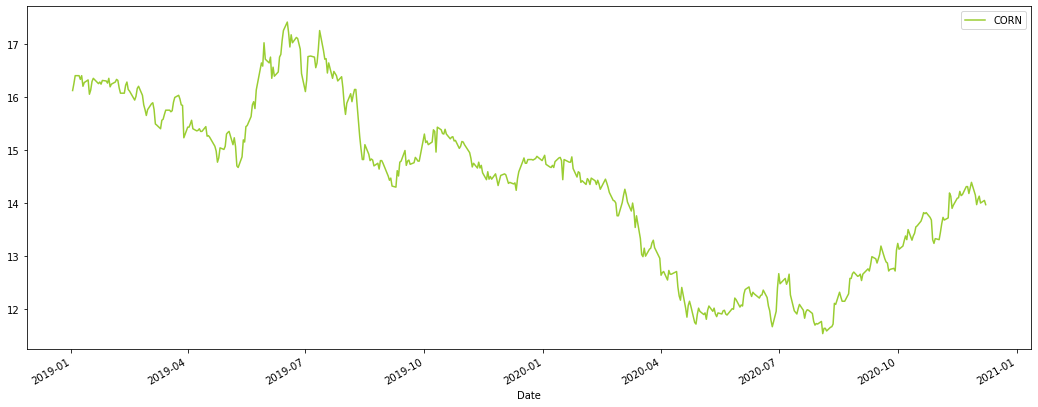

In [87]:
ticker = ['CORN']
start_date = '2019-01-01'

closes_corn = get_adj_closes(ticker, start_date)
closes_corn.plot(figsize=(18,7), color="yellowgreen");
plt.legend(ticker);

In [88]:
print("Último Precio del maíz: {}".format(closes_corn.iloc[-1][0]))

Último Precio del maíz: 13.970000267028809


**Rendimientos del maíz**

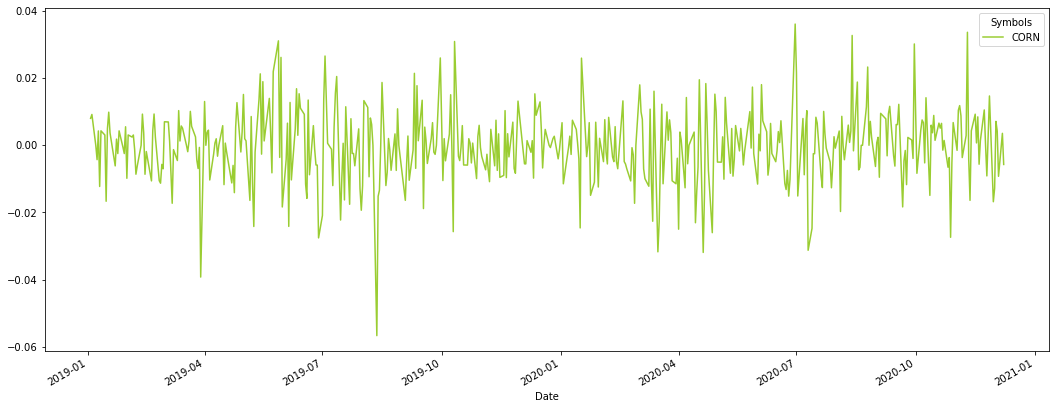

In [89]:
ret_corn = calc_daily_ret(closes_corn)
ret_corn.plot(figsize=(18,7),color="yellowgreen");

In [90]:
opt_deseada = corn_opt.loc[(corn_opt.Type=='put') & (corn_opt.Strike==25)& (corn_opt.Expiry==fecha_corn1) ]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
119,25.0,2021-05-21,put,...,2020-12-08 21:00:00,2020-10-05 04:02:29,"{'contractSymbol': 'CORN210521P00025000', 'str..."


In [91]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar['JSON']

{'contractSymbol': 'CORN210521P00025000',
 'strike': 25.0,
 'currency': 'USD',
 'lastPrice': 11.9,
 'change': 0.0,
 'percentChange': 0.0,
 'openInterest': 1,
 'bid': 11.1,
 'ask': 11.7,
 'contractSize': 'REGULAR',
 'expiration': 1621555200,
 'lastTradeDate': 1601870549,
 'impliedVolatility': 0.6660189648437502,
 'inTheMoney': True}

In [92]:
mu_corn = ret_corn.mean()[0]
sigma_corn = ret_corn.std()[0]
S0 = closes_corn.iloc[-1][0]
# Tasa de bonos de 1 yr 
r = 0.0017/360 
# Histograma y probabiliadades
freq, values = np.histogram(ret_corn-mu_corn+r, bins=10000)
prob = freq/np.sum(freq)
# Fechas
ndays = (opt_valuar.Expiry.date()-datetime.today().date()).days
nscen = 1000
dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')

ret = np.random.choice(values[1:], (ndays,nscen), p = prob)
sim_ret_hist = pd.DataFrame(ret,index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

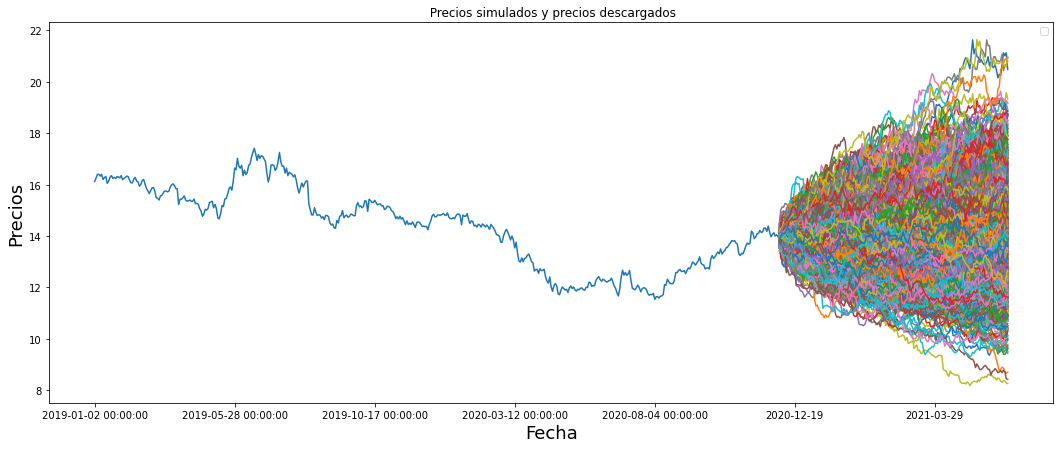

In [93]:
#pd.concat([closes_corn,sim_closes]).plot(figsize=(8,6),legend=False);
pd.concat([closes_corn,sim_closes_hist]).plot(figsize=(18,7),legend=False)
plt.ylabel("Precios",size=18)
plt.xlabel("Fecha",size=18)
plt.title(" Precios simulados y precios descargados")
plt.legend([])
plt.show()

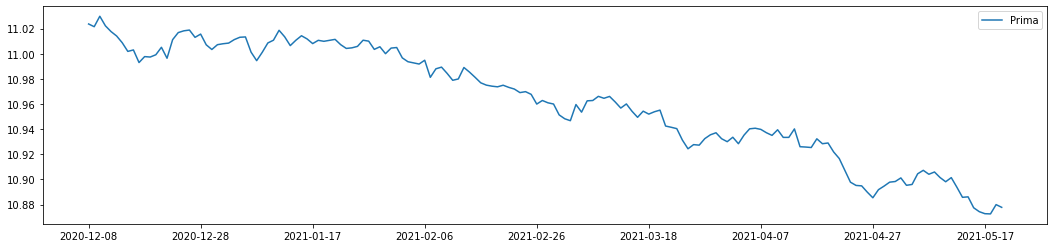

In [94]:
K = opt_valuar.Strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put.plot(figsize=(18,4));

In [95]:
precio_put1 = put.iloc[-1]
precio_promedio = np.round(sim_closes_hist.mean().mean(),3)
precio_put1

Prima    10.878
Name: 2021-05-20, dtype: float64

## Opción Barrera Down-and-out, Put

In [115]:
B = 11  # Precio barrera
barrier = pd.DataFrame(B*np.ones((ndays, nscen)),index=dates)
I = (sim_closes_hist>barrier).cumprod()>0
strike = pd.DataFrame(K*np.ones((ndays, nscen)),index=dates)
putdo = pd.DataFrame({'Prima Down-and-Out':np.exp(-r*ndays)*(I*np.fmax(strike-sim_closes_hist,np.zeros((ndays,nscen)))).T.mean()},index=dates)
precio_put2 = putdo.iloc[-1]
precio_put2

Prima Down-and-Out    9.687
Name: 2021-05-20, dtype: float64

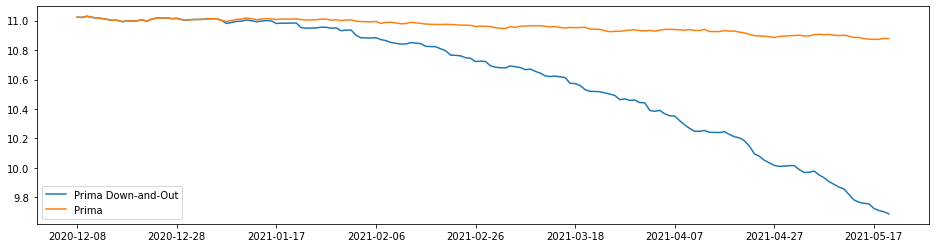

In [116]:
ax = putdo.plot(figsize=(16,4));
put.plot(ax=ax);
plt.show()

## Opción Asiática

In [117]:
precio_put3 = Riemann_approach(K,r*360,S0,nscen,ndays,sigma_corn*np.sqrt(360),T=1)[0]
precio_put3

10.98359564512241

In [118]:
data_final = pd.DataFrame(index = ["Europea","Barrera Down-and-out","Asiática"], columns=["Precio"])
data_final["Precio"] = [precio_put1[0],precio_put2[0],precio_put3]
data_final.index.name = "Opción Put"
data_final

,Precio
Opción Put,
Europea,10.878
Barrera Down-and-out,9.687
Asiática,10.984


## **Recomendación Maíz:**
    
El granjero que cultiva maíz busca maximizar ganancias y minimizar pérdidas, esto con una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos.

Para esto, se escogió la mejor opción por medio de sus primas.

Como observamos en la tabla de arriba, el precio más bajo es de la opción de Barrera, pero tenemos que tomar en cuenta que cuando la barrera tenga ese precio, se desactivará, por lo tanto, la mejor opción es la **europea** por su precio.




# <span style="background:yellow">RESPUESTA 2.2<span>
    
    > 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este
    tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que 
    le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.

El futuro de los precios de las materias primas, tales como el aluminio, en este caso, es muy incierto. Para no sufrir por esta incertidumbre, lo que se recomienda asegurar el precio de compra de la materia prima en el proceso de producción.

* **Tipo de opciones**: (CALL) 

In [119]:
alum = web.YahooOptions('IYM')
alum_opt = alum.get_all_data().reset_index()
alum_opt.set_index('Expiry').sort_index().head(17)

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-12-18,91.0,put,IYM201218P00091000,...,2020-12-08 21:00:00,2020-11-06 20:40:08,"{'contractSymbol': 'IYM201218P00091000', 'stri..."
2020-12-18,95.0,call,IYM201218C00095000,...,2020-12-08 21:00:00,2020-09-02 19:41:01,"{'contractSymbol': 'IYM201218C00095000', 'stri..."
2020-12-18,115.0,call,IYM201218C00115000,...,2020-12-08 21:00:00,2020-09-21 04:14:34,"{'contractSymbol': 'IYM201218C00115000', 'stri..."
2020-12-18,110.0,call,IYM201218C00110000,...,2020-12-08 21:00:00,2020-11-18 15:58:01,"{'contractSymbol': 'IYM201218C00110000', 'stri..."
2020-12-18,105.0,call,IYM201218C00105000,...,2020-12-08 21:00:00,2020-10-28 14:59:20,"{'contractSymbol': 'IYM201218C00105000', 'stri..."
...,...,...,...,...,...,...,...
2021-03-19,101.0,call,IYM210319C00101000,...,2020-12-08 21:00:00,2020-11-06 14:56:01,"{'contractSymbol': 'IYM210319C00101000', 'stri..."
2021-03-19,100.0,call,IYM210319C00100000,...,2020-12-08 21:00:00,2020-11-09 14:30:12,"{'contractSymbol': 'IYM210319C00100000', 'stri..."
2021-03-19,90.0,put,IYM210319P00090000,...,2020-12-08 21:00:00,2020-11-11 14:30:07,"{'contractSymbol': 'IYM210319P00090000', 'stri..."


In [120]:
fecha_alum = '2021-06-18'
put_alum = alum_opt.loc[(alum_opt.Expiry==fecha_alum) & (alum_opt.Type=='call')]
put_alum

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
10,108.0,2021-06-18,call,...,2020-12-08 21:00:00,2020-11-24 16:52:37,"{'contractSymbol': 'IYM210618C00108000', 'stri..."
13,111.0,2021-06-18,call,...,2020-12-08 21:00:00,2020-12-04 19:15:12,"{'contractSymbol': 'IYM210618C00111000', 'stri..."
17,120.0,2021-06-18,call,...,2020-12-08 21:00:00,2020-10-19 17:38:07,"{'contractSymbol': 'IYM210618C00120000', 'stri..."
18,135.0,2021-06-18,call,...,2020-12-08 21:00:00,2020-12-04 20:31:28,"{'contractSymbol': 'IYM210618C00135000', 'stri..."
19,140.0,2021-06-18,call,...,2020-12-08 21:00:00,2020-11-30 18:08:19,"{'contractSymbol': 'IYM210618C00140000', 'stri..."


**Precios históricos del aluminio**

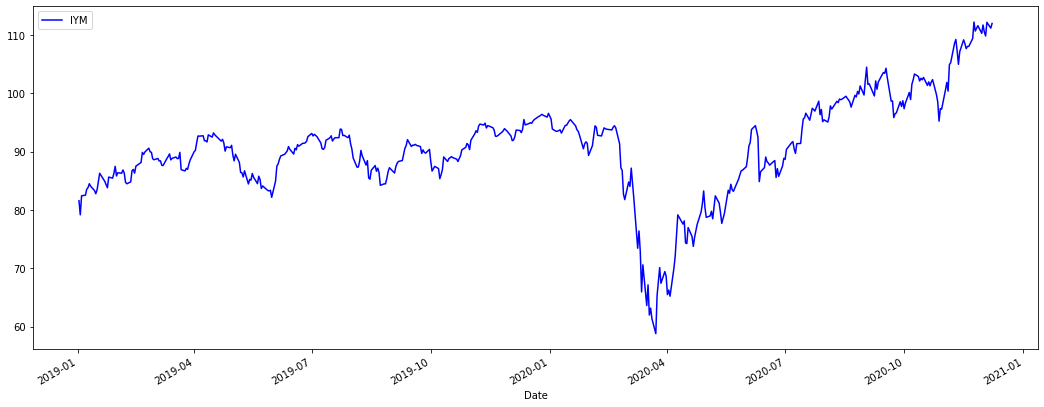

In [121]:
ticker = ['IYM']
start_date = '2019-01-01'

closes_alum = get_adj_closes(ticker, start_date)
closes_alum.plot(figsize=(18,7), color="blue");
plt.legend(ticker);

In [122]:
print("Último Precio del aluminio: {}".format(closes_alum.iloc[-1][0]))

Último Precio del aluminio: 112.0


**Rendimientos del aluminio**

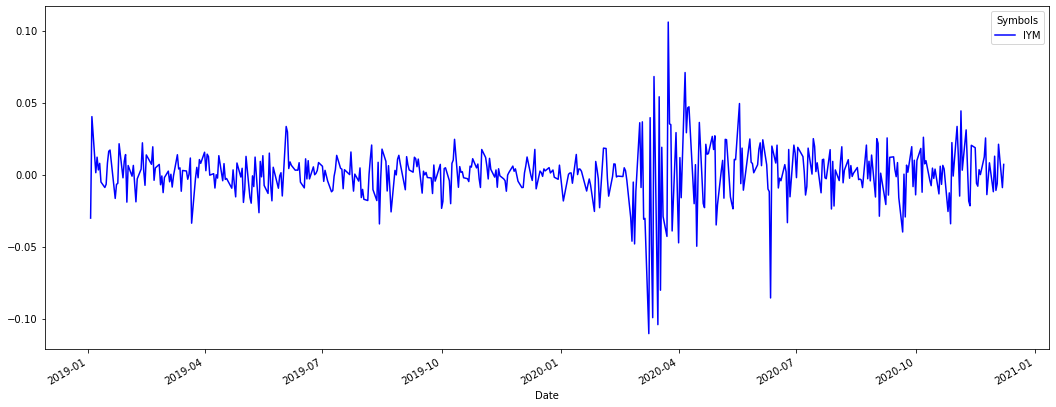

In [123]:
ret_alum = calc_daily_ret(closes_alum)
ret_alum.plot(figsize=(18,7),color="blue");

In [124]:
opt_deseada = alum_opt.loc[(alum_opt.Type=='call') &  (alum_opt.Strike==108) & (alum_opt.Expiry==fecha_alum) ]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
10,108.0,2021-06-18,call,...,2020-12-08 21:00:00,2020-11-24 16:52:37,"{'contractSymbol': 'IYM210618C00108000', 'stri..."


In [125]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar['JSON']

{'contractSymbol': 'IYM210618C00108000',
 'strike': 108.0,
 'currency': 'USD',
 'lastPrice': 9.2,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 4,
 'bid': 8.4,
 'ask': 9.9,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1606236757,
 'impliedVolatility': 0.24329369995117187,
 'inTheMoney': True}

In [126]:
mu_alum = ret_alum.mean()[0]
sigma_alum = ret_alum.std()[0]
S0 = closes_alum.iloc[-1][0]
# Tasa de bonos de 1 yr  12/07/20
r = 0.0010/360 
# Histograma y probabiliadades
freq, values = np.histogram(ret_alum-mu_alum+r, bins=10000)
prob = freq/np.sum(freq)
# Fechas
ndays = (opt_valuar.Expiry.date()-datetime.today().date()).days
nscen = 1000
dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')

ret = np.random.choice(values[1:], (ndays,nscen), p = prob)
sim_ret_hist = pd.DataFrame(ret,index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

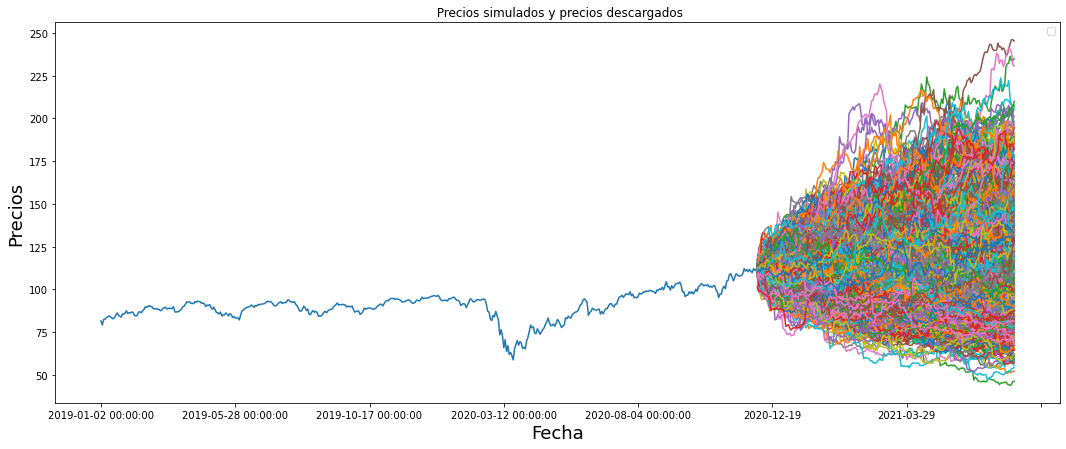

In [127]:
pd.concat([closes_alum,sim_closes_hist]).plot(figsize=(18,7),legend=False)
plt.ylabel("Precios",size=18)
plt.xlabel("Fecha",size=18)
plt.title(" Precios simulados y precios descargados")
plt.legend([])
plt.show()

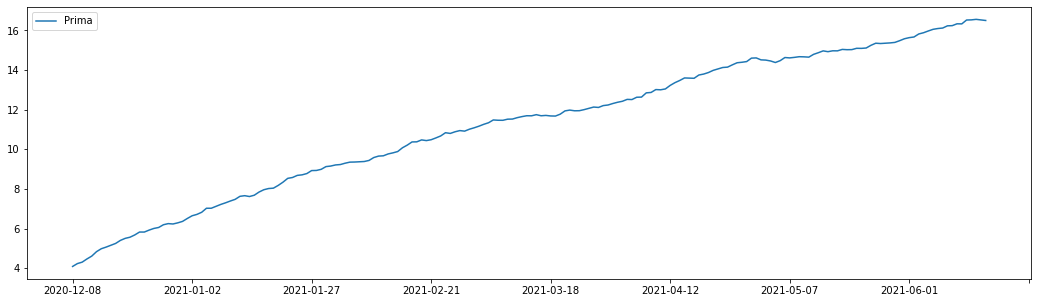

In [128]:
K = opt_valuar.Strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call.plot(figsize=(18,5));

In [129]:
precio_call = call.iloc[-1]
precio_promedio = np.round(sim_closes_hist.mean().mean(),3)
precio_call

Prima    16.501
Name: 2021-06-17, dtype: float64

## Opción Barrera Up-and-in Call

In [130]:
B = 111  # Precio barrera
barrier = pd.DataFrame(B*np.ones((ndays, nscen)),index=dates)
I = (sim_closes_hist<barrier).cumsum()>0
strike = pd.DataFrame(K*np.ones((ndays, nscen)),index=dates)
callui = pd.DataFrame({'Prima Down-and-in':np.exp(-r*ndays)*(I*np.fmax(sim_closes_hist-strike,np.zeros((ndays,nscen)))).T.mean()},index=dates)

In [131]:
precio_call1 = callui.iloc[-1]
precio_call1

Prima Down-and-in    12.897
Name: 2021-06-17, dtype: float64

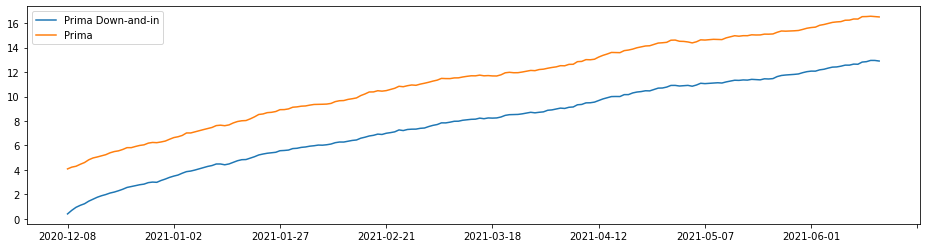

In [132]:
ax = callui.plot(figsize=(16,4));
call.plot(ax=ax);
plt.show()

## Opción Asiática

In [133]:
precio_call3 = Riemann_approach(K,r*360,S0,nscen,ndays,sigma_alum*np.sqrt(360),T=1)[1]
precio_call3

10.972537841235642

In [134]:
data_final = pd.DataFrame(index = ["Europea","Barrera Up-and-in","Asiática"], columns=["Precio"])
data_final["Precio"] = [precio_call[0],precio_call1[0],precio_call3]
data_final.index.name = "Opción Call"
data_final

,Precio
Opción Call,
Europea,16.501
Barrera Up-and-in,12.897
Asiática,10.973


## **Recomendación Aluminio:**

Se creará un plan de acción para expandir la empresa, esto realizando estrategias financieras que le permitan maximizar sus ganancias y así, cumplir con el objetivo planteado.

Para esto se valuaron 3 tipos de opciones.

Como observamos en la tabla de arriba, el precio de la prima más bajo es de la opción **Asiática** y es la opción recomendada.

# <span style="background:yellow">RESPUESTA 2.3<span>
    
     3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para 
    intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.

Cuando la gente cree que la economía empeorará, compran oro, ya que el oro siempre ha funcionado como reserva de valor.

Si este material es usado para fabricar piezas, se busca un precio estable de compra para poder preveer los ingresos en el futuro. 

* **Tipo de opciones**: (CALL)


In [135]:
gold = web.YahooOptions('GOLD')
gold_opt = gold.get_all_data().reset_index()
gold_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-12-11,21.5,call,GOLD201211C00021500,...,2020-12-08 21:00:02,2020-12-07 17:48:45,"{'contractSymbol': 'GOLD201211C00021500', 'str..."
2020-12-11,21.0,call,GOLD201211C00021000,...,2020-12-08 21:00:02,2020-12-02 17:03:20,"{'contractSymbol': 'GOLD201211C00021000', 'str..."
2020-12-11,19.0,call,GOLD201211C00019000,...,2020-12-08 21:00:02,2020-11-27 14:40:21,"{'contractSymbol': 'GOLD201211C00019000', 'str..."
2020-12-11,27.0,put,GOLD201211P00027000,...,2020-12-08 21:00:02,2020-12-04 17:51:36,"{'contractSymbol': 'GOLD201211P00027000', 'str..."
2020-12-11,27.0,call,GOLD201211C00027000,...,2020-12-08 21:00:02,2020-12-08 20:53:42,"{'contractSymbol': 'GOLD201211C00027000', 'str..."
...,...,...,...,...,...,...,...
2023-01-20,15.0,call,GOLD230120C00015000,...,2020-12-08 21:00:02,2020-12-08 20:56:00,"{'contractSymbol': 'GOLD230120C00015000', 'str..."
2023-01-20,35.0,call,GOLD230120C00035000,...,2020-12-08 21:00:02,2020-12-08 18:43:07,"{'contractSymbol': 'GOLD230120C00035000', 'str..."
2023-01-20,35.0,put,GOLD230120P00035000,...,2020-12-08 21:00:02,2020-11-25 18:35:24,"{'contractSymbol': 'GOLD230120P00035000', 'str..."


In [136]:
fecha_gold = '2021-02-19'
put_gold = gold_opt.loc[(gold_opt.Expiry==fecha_gold) & (gold_opt.Type=='call')]
put_gold

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
28,15.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-07 17:42:22,"{'contractSymbol': 'GOLD210219C00015000', 'str..."
50,17.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 18:14:43,"{'contractSymbol': 'GOLD210219C00017000', 'str..."
65,18.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-01 20:33:09,"{'contractSymbol': 'GOLD210219C00018000', 'str..."
87,19.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 16:59:26,"{'contractSymbol': 'GOLD210219C00019000', 'str..."
110,20.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 20:15:25,"{'contractSymbol': 'GOLD210219C00020000', 'str..."
...,...,...,...,...,...,...,...
329,27.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 20:58:08,"{'contractSymbol': 'GOLD210219C00027000', 'str..."
360,28.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 20:16:09,"{'contractSymbol': 'GOLD210219C00028000', 'str..."
385,29.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 20:07:19,"{'contractSymbol': 'GOLD210219C00029000', 'str..."
409,30.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 16:56:48,"{'contractSymbol': 'GOLD210219C00030000', 'str..."


**Precios históricos del oro**

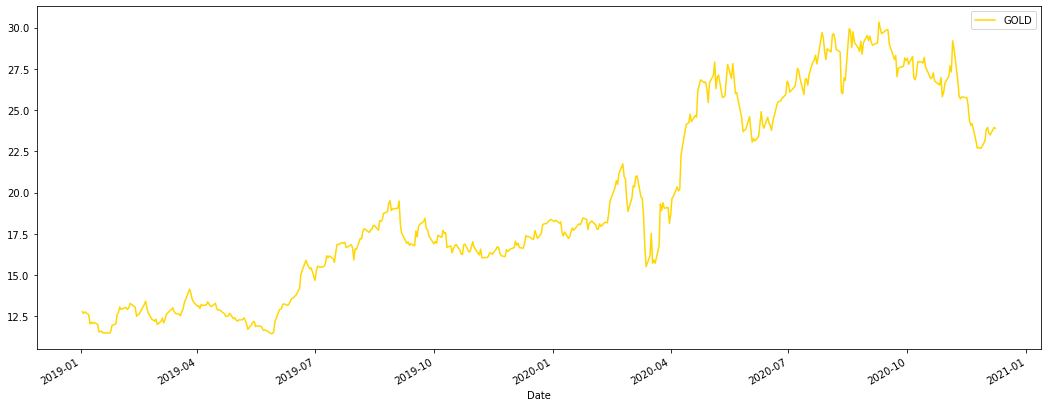

In [137]:
ticker = ['GOLD']
start_date = '2019-01-01'

closes_gold = get_adj_closes(ticker, start_date)
closes_gold.plot(figsize=(18,7), color="gold");
plt.legend(ticker);

In [138]:
print("Último Precio del oro: {}".format(closes_gold.iloc[-1][0]))

Último Precio del oro: 23.899999618530273


**Rendimientos del oro**

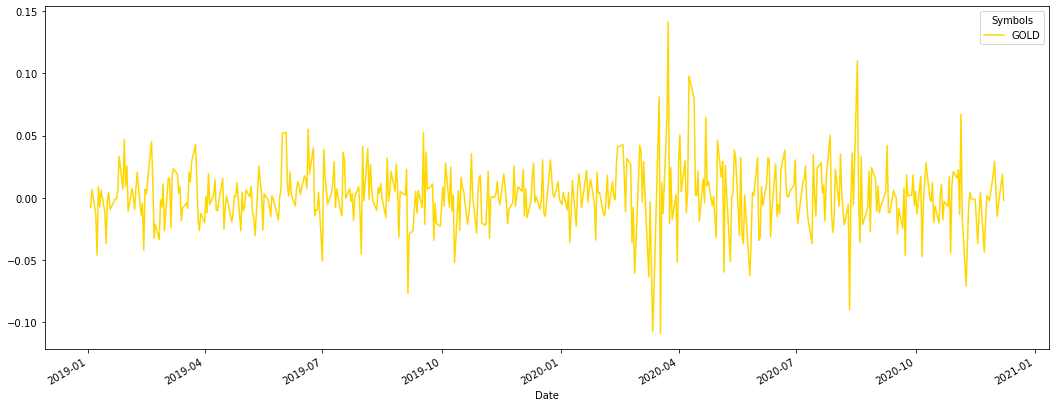

In [139]:
ret_gold = calc_daily_ret(closes_gold)
ret_gold.plot(figsize=(18,7),color="gold");

In [140]:
opt_deseada_2 = gold_opt.loc[(gold_opt.Type=='call') &  (gold_opt.Strike==19) & (gold_opt.Expiry==fecha_gold) ]
opt_deseada_2

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
87,19.0,2021-02-19,call,...,2020-12-08 21:00:02,2020-12-08 16:59:26,"{'contractSymbol': 'GOLD210219C00019000', 'str..."


In [141]:
opt_valuar_2 = opt_deseada_2.loc[list(opt_deseada_2.index)[0]]
opt_valuar_2['JSON']

{'contractSymbol': 'GOLD210219C00019000',
 'strike': 19.0,
 'currency': 'USD',
 'lastPrice': 5.0,
 'change': -0.13999987,
 'percentChange': -2.723733,
 'volume': 162,
 'openInterest': 550,
 'bid': 5.05,
 'ask': 5.3,
 'contractSize': 'REGULAR',
 'expiration': 1613692800,
 'lastTradeDate': 1607446766,
 'impliedVolatility': 0.5107470800781251,
 'inTheMoney': True}

In [142]:
mu_gold = ret_gold.mean()[0]
sigma_gold = ret_gold.std()[0]
S0 = closes_gold.iloc[-1][0]
# Tasa de bonos de 1 yr 
r = 0.0010/360 
# Histograma y probabiliadades
freq, values = np.histogram(ret_gold-mu_gold+r, bins=10000)
prob = freq/np.sum(freq)
# Fechas
ndays = (opt_valuar_2.Expiry.date()-datetime.today().date()).days
nscen = 1000
dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')

ret = np.random.choice(values[1:], (ndays,nscen), p = prob)

sim_ret_hist = pd.DataFrame(ret,index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())


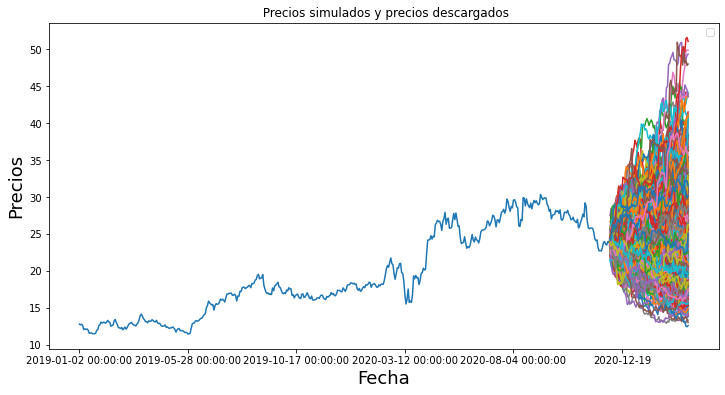

In [143]:
#pd.concat([closes_corn,sim_closes]).plot(figsize=(8,6),legend=False);
pd.concat([closes_gold,sim_closes_hist]).plot(figsize=(12,6),legend=False)
plt.ylabel("Precios",size=18)
plt.xlabel("Fecha",size=18)
plt.title(" Precios simulados y precios descargados")
plt.legend([])
plt.show()

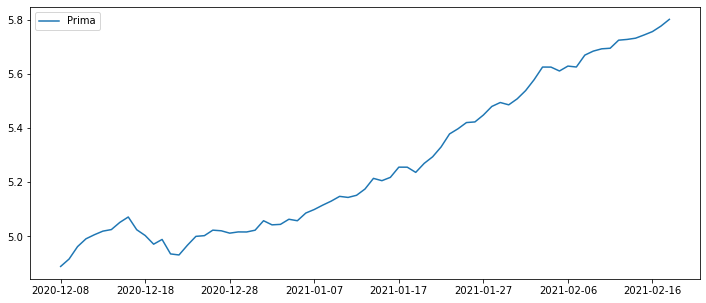

In [144]:
K = opt_valuar_2.Strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call.plot(figsize=(12,5));

In [145]:
precio_call_gold = call.iloc[-1]
precio_call_gold

Prima    5.803
Name: 2021-02-18, dtype: float64

## Opción Barrera Up-and-in Call

In [146]:
B = 26  # Precio barrera
barrier = pd.DataFrame(B*np.ones((ndays, nscen)),index=dates)
I = (sim_closes_hist>barrier).cumsum()>0
strike = pd.DataFrame(K*np.ones((ndays, nscen)),index=dates)
callui = pd.DataFrame({'Prima Up-and-in':np.exp(-r*ndays)*(I*np.fmax(sim_closes_hist-strike,np.zeros((ndays,nscen)))).T.mean()},index=dates)

In [147]:
precio_call2go = callui.iloc[-1]
precio_call2go

Prima Up-and-in    5.125
Name: 2021-02-18, dtype: float64

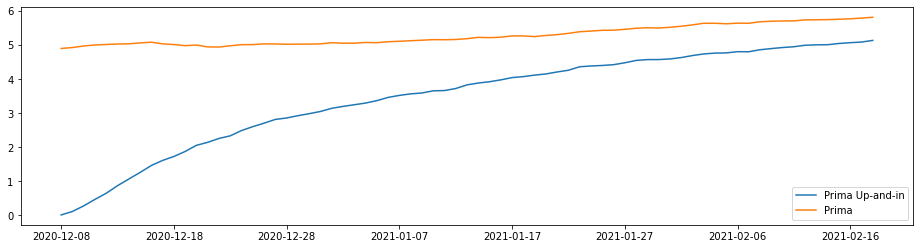

In [148]:
ax = callui.plot(figsize=(16,4));
call.plot(ax=ax);
plt.show()

## Opción Asiática

In [149]:
precio_call3go = Riemann_approach(K,r*360,S0,nscen,ndays,sigma_gold*np.sqrt(360),T=1)[1]
precio_call3go

5.418975920203172

In [150]:
data_final = pd.DataFrame(index = ["Europea","Barrera Up-and-in","Asiática"], columns=["Precio"])
data_final["Precio"] = [precio_call_gold[0],precio_call2go[0],precio_call3go]
data_final.index.name = "Opción Call"
data_final

,Precio
Opción Call,
Europea,5.803
Barrera Up-and-in,5.125
Asiática,5.419


**Recomendación Oro:**

El cliente acude a nosotros para intentar mitigar las fluctuaciones  en el precio del oro, usando una adecuada estrategia financiera. 

Para esto, se valuaron 3 tipos de opciones y así, se logró escoger la mejor.

Con la tabla de arriba, se puede ver que el precio de la prima más bajo es de la opción Barrera, la cual no recomendaremos ya que ésta corre el riesgo de desactivarse, por lo tanto, la opción recomendada es la **ASIÁTICA**, que como podemos observar, es la menor entre la europea y la asiática.

## <span style="background:yellow">RESPUESTA 2.4<span>
    
     4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les
    permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y
    minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).
    
PEMEX, actualmente, compra un call y vende otro call con un precio de ejercicio un poco más alto al primero.
Con esto, se les permite disminuir su costo de cobertura, pero también puede aumentar su costo de oportunidad al limitar su ganancia en caso de que le precio del petróleo suba.

Se busca tener asegurado un *precio mínimo de venta* del petróleo producido para cierta fecha.

* **Tipo de opciones**: (PUT)


In [151]:
oil = web.YahooOptions('BNO')
oil_opt = oil.get_all_data().reset_index()
oil_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-12-18,13.0,call,BNO201218C00013000,...,2020-12-08 21:00:00,2020-12-04 18:59:54,"{'contractSymbol': 'BNO201218C00013000', 'stri..."
2020-12-18,9.0,put,BNO201218P00009000,...,2020-12-08 21:00:00,2020-11-12 17:41:34,"{'contractSymbol': 'BNO201218P00009000', 'stri..."
2020-12-18,11.0,call,BNO201218C00011000,...,2020-12-08 21:00:00,2020-12-08 17:23:49,"{'contractSymbol': 'BNO201218C00011000', 'stri..."
2020-12-18,11.0,put,BNO201218P00011000,...,2020-12-08 21:00:00,2020-12-07 18:38:35,"{'contractSymbol': 'BNO201218P00011000', 'stri..."
2020-12-18,8.0,put,BNO201218P00008000,...,2020-12-08 21:00:00,2020-12-01 15:07:38,"{'contractSymbol': 'BNO201218P00008000', 'stri..."
...,...,...,...,...,...,...,...
2022-01-21,18.0,call,BNO220121C00018000,...,2020-12-08 21:00:00,2020-10-16 16:18:14,"{'contractSymbol': 'BNO220121C00018000', 'stri..."
2023-01-20,10.0,call,BNO230120C00010000,...,2020-12-08 21:00:00,2020-11-09 18:18:47,"{'contractSymbol': 'BNO230120C00010000', 'stri..."
2023-01-20,11.0,call,BNO230120C00011000,...,2020-12-08 21:00:00,2020-11-19 14:31:14,"{'contractSymbol': 'BNO230120C00011000', 'stri..."


In [152]:
fecha_oil = '2021-07-16'
put_oil = oil_opt.loc[(oil_opt.Expiry==fecha_oil) & (oil_opt.Type=='put')]
put_oil

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
15,7.0,2021-07-16,put,...,2020-12-08 21:00:00,2020-11-23 14:30:01,"{'contractSymbol': 'BNO210716P00007000', 'stri..."
34,10.0,2021-07-16,put,...,2020-12-08 21:00:00,2020-11-23 14:30:01,"{'contractSymbol': 'BNO210716P00010000', 'stri..."


**Precios históricos del petróleo**

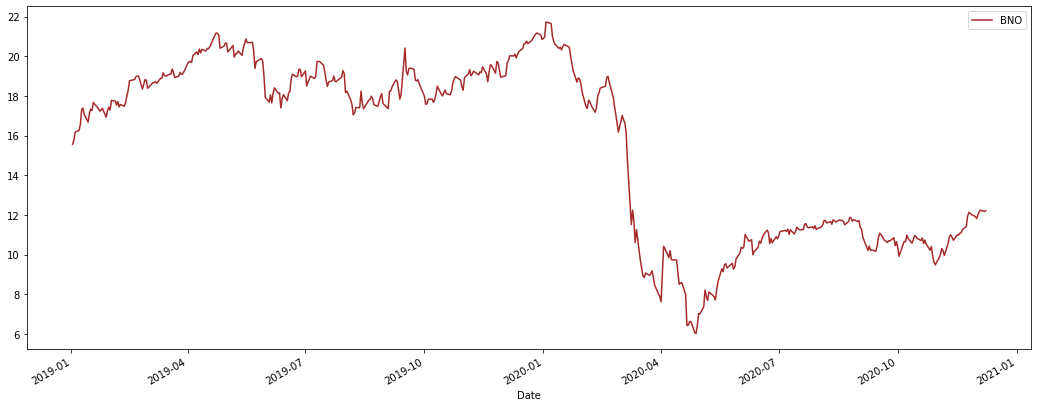

In [153]:
ticker = ['BNO']
start_date = '2019-01-01'

closes_oil = get_adj_closes(ticker, start_date)
closes_oil.plot(figsize=(18,7), color="brown");
plt.legend(ticker);

In [154]:
print("Último Precio: {}".format(closes_oil.iloc[-1][0]))

Último Precio: 12.210000038146973


**Rendimientos del petróleo**

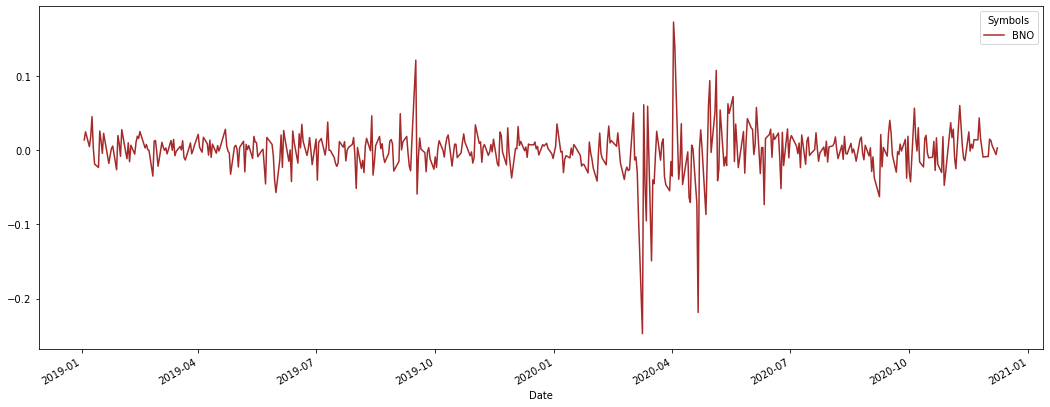

In [155]:
ret_oil = calc_daily_ret(closes_oil)
ret_oil.plot(figsize=(18,7),color="brown");

In [188]:
opt_deseada = oil_opt.loc[(oil_opt.Type=='put') & (oil_opt.Strike==10)& (oil_opt.Expiry==fecha_oil) ]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
34,10.0,2021-07-16,put,...,2020-12-08 21:00:00,2020-11-23 14:30:01,"{'contractSymbol': 'BNO210716P00010000', 'stri..."


In [189]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar['JSON']

{'contractSymbol': 'BNO210716P00010000',
 'strike': 10.0,
 'currency': 'USD',
 'lastPrice': 1.37,
 'change': 0.0,
 'percentChange': 0.0,
 'openInterest': 5,
 'bid': 0.5,
 'ask': 1.9,
 'contractSize': 'REGULAR',
 'expiration': 1626393600,
 'lastTradeDate': 1606141801,
 'impliedVolatility': 0.6259803027343751,
 'inTheMoney': False}

In [190]:
mu_oil = ret_oil.mean()[0]
sigma_oil = ret_oil.std()[0]
S0 = closes_oil.iloc[-1][0]
# Tasa de bonos de 1 yr 
r = 0.0010/360 
# Histograma y probabiliadades
freq, values = np.histogram(ret_oil-mu_oil+r, bins=10000)
prob = freq/np.sum(freq)
# Fechas
ndays = (opt_valuar.Expiry.date()-datetime.today().date()).days
nscen = 1000
dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')

ret = np.random.choice(values[1:], (ndays,nscen), p = prob)
sim_ret_hist = pd.DataFrame(ret,index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

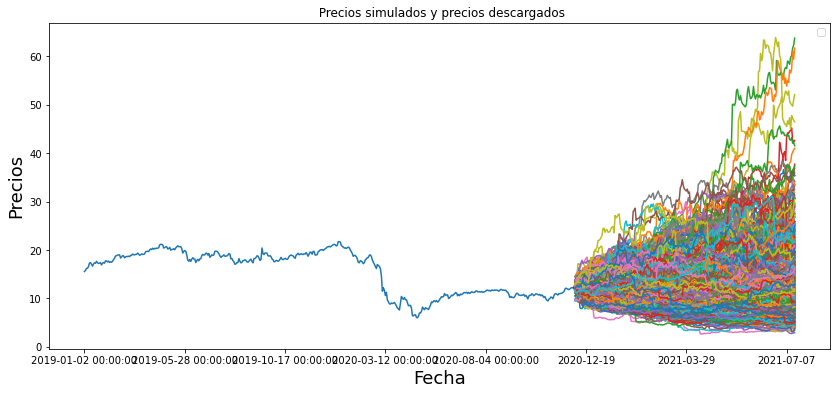

In [191]:
#pd.concat([closes_corn,sim_closes]).plot(figsize=(8,6),legend=False);
pd.concat([closes_oil,sim_closes_hist]).plot(figsize=(14,6),legend=False)
plt.ylabel("Precios",size=18)
plt.xlabel("Fecha",size=18)
plt.title(" Precios simulados y precios descargados")
plt.legend([])
plt.show()

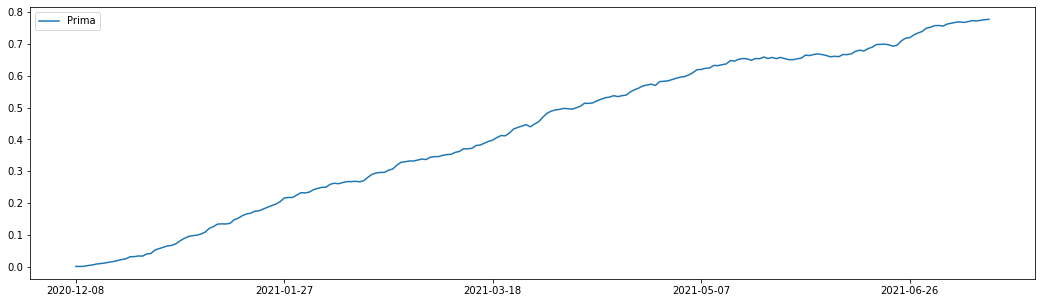

In [192]:
K = opt_valuar.Strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put.plot(figsize=(18,5));

In [193]:
precio_put = put.iloc[-1]
precio_promedio = np.round(sim_closes_hist.mean().mean(),3)
precio_put

Prima    0.776
Name: 2021-07-15, dtype: float64

## Opción Barrera Down-and-out, Put

In [194]:
B = 7  # Precio barrera
barrier = pd.DataFrame(B*np.ones((ndays, nscen)),index=dates)
I = (sim_closes_hist>barrier).cumprod()>0
strike = pd.DataFrame(K*np.ones((ndays, nscen)),index=dates)
putdo = pd.DataFrame({'Prima Down-and-Out':np.exp(-r*ndays)*(I*np.fmax(strike-sim_closes_hist,np.zeros((ndays,nscen)))).T.mean()},index=dates)
precio_put2 = putdo.iloc[-1]
precio_put2

Prima Down-and-Out    0.165
Name: 2021-07-15, dtype: float64

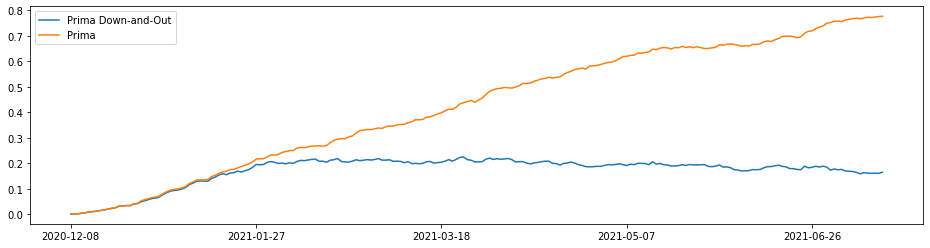

In [195]:
ax = putdo.plot(figsize=(16,4));
put.plot(ax=ax);
plt.show()

## Opción Asiática

In [196]:
precio_put3 = Riemann_approach(K,r*360,S0,nscen,ndays,sigma_oil*np.sqrt(360),T=1)[0]
precio_put3

0.5999630827784881

In [197]:
data_final = pd.DataFrame(index = ["Europea","Barrera Down-and-out","Asiática"], columns=["Precio"])
data_final["Precio"] = [precio_put[0],precio_put2[0],precio_put3]
data_final.index.name = "Opción Put"
data_final

,Precio
Opción Put,
Europea,0.776
Barrera Down-and-out,0.165
Asiática,0.600


## **Recomendación PEMEX:**

El objetivo del cliente es maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera.

Para esto, se valuaron 3 tipos de opciones.

Igual que en los ejercicios anteriores, se recomendará la mejor opción basándonos en el precio de sus primas.
Con la tabla de arriba, el precio de la prima más bajo es de la opción Barrera, pero tenemos que tomar en cuenta que cuando la barrera tenga ese precio, se desactivará, por lo tanto, la opción recomendada es la **asiática**, ya que su precio de prima es el menor.


> ### Criterio de evaluación
> - Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
> - **Ejercicio 1**: 30%
> - **Ejercicio 2**: 70%. La valuación de cada tipo de opción corresponderá al 60% de este ejercicio y el restante 40% corresponderá a la decisión o recomendación basado en sus análisis que le recomendarán a cada compañía.

> ### Entrega
> - Se debe de entregar un cuaderno de python donde se reporten todos los cálculos empleados en su análisis. La fecha límite de entrega será el jueves 5 de diciembre a las 8 pm y se expondrá ese mismo día los resultados obtenidos.

> ### Suposiciones 
> - Deben de definirse correctamente el nombre de las acciones a descargar de Yahoo según la empresa asignada.
> - El examen es individual y códigos idénticos serán penalizados.


In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
def BSprices(mu,sigma,S0,NbTraj,NbStep):
    """
    Expresión de la solución de la ecuación de Black-Scholes
    St = S0*exp((r-sigma^2/2)*t+ sigma*DeltaW)
    
    Parámetros
    ---------
    mu    : Tasa libre de riesgo
    sigma : Desviación estándar de los rendimientos
    S0    : Precio inicial del activo subyacente
    NbTraj: Cantidad de trayectorias a simular
    NbStep: Número de días a simular
    """
    # Datos para la fórmula de St
    nu = mu-(sigma**2)/2
    DeltaT = 1/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep-1)
    
    # Se obtiene --> Ln St = Ln S0+ nu*DeltaT + sigma*DeltaW
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    
    # Se utiliza cumsum por que se quiere simular los precios iniciando desde S0
    LogSt = np.cumsum(concat,axis=1)
    # Se obtienen los precios simulados para los NbStep fijados
    St = np.exp(LogSt)
    # Vector con la cantidad de días simulados
    t = np.arange(0,NbStep)

    return St.T,t

In [23]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [3]:
def Riemann_approach(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad',T:'Tiempo de cierre del contrato en años',
                    flag=None):
    St,t = BSprices(r,sigma,S0,NbTraj,NbStep)
    prices = pd.DataFrame(St,index=t)
    Average_t = prices.expanding().mean()
    strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=t)
    put = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(strike-Average_t,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t) 
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
             *np.fmax(Average_t-strike,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t) 
    return put.iloc[-1].Prima,call.iloc[-1].Prima

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>